# Support Vector Machines in Python
In this project we will built **Support Vector Machine** for **classification**(shown below) using **scikit-learn** and the **Radial Basis Function (RBF) Kernel**. Our training data set contains continuous and categorical dta from the **[UCI Machine Learning Respository](https://archive.ics.uci.edu/ml/index.php)** to predict whether or not a patient has **[Heart Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**.

<img src="svm.png" alt="A Support Vector Machine" width="600">

**Support Vector Machine** are one of the best machine learning methods when getting the correct answer is a higher priority than understanding why you get the correct answer, and they work really well with relatively small datasets.

You will learn about:
- **[Importing the Data From a File](#download-the-data)**
- **[Missing Data](#identify-and-deal-with-missing-data)**
    - Identifying Missing Data
    - Dealing with Missing Data

- **[Formatting the Data for Support Vector Machines](#format-the-data)**
    - Split data into Dependent and Independent Varaibles
    - One-Hot-Encoding
    - Centering and Scaling the Data

- **[Building a Preliminary Support Vector Machine](#build-svm)**
- **[Optimizing Paramters with Cross Validation](#optimize-svm)**
    - Cross Validation for finding the best values for Gamma and Regularization
   
- **[Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine](#draw-svm)**

#### Concepts:
- **Support Vector Machine**:
- **Radial Basis Function(RBF)**:
- **Regularization**:
- **Cross Validation**:
- **Confusion Matrices**:


# Task 1: Import the modules that will do all the work
The very first thing we do is load in a bunch of python modules. 

In [1]:
import pandas as pd # used to load and manipulate data, for One-Hot Encoding
import numpy as np # to calculate mean and std. deviation
import matplotlib.pyplot as plt # for drawing graphs
import matplotlib.colors as colors

from sklearn.model_selection import train_test_split # split data into training and testing set
from sklearn.preprocessing import scale #scale and center data
from sklearn.svm import SVC # for SVM classification 
from sklearn.model_selection import GridSearchCV # this will do cros validation 
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data


<a id= "download-the-data"> </a>
    
# Task 2: Import the data
This data set will allow us to predict if someone has heart disease based on their sex,age, blood pressure and a variety of other metrics.

**NOTE:** When **pandas** (**pd**) reads in data, it returns a **data frame**, which is a lot like a spreadsheet.The data are organized in rows and cloumns and each row can contain a mixture of text and numbers. The standard variable name for a **data frame** is the intials **df**.

In [2]:
df = pd.read_csv('processed.cleveland.data',
                 header=None)

Now that we have loaded the data into a **data frame**.
Using `head()` function we will see first five rows.

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We see that instead of nice column names, we just have column numbers. Since nice columns names would make it easier to konw how to format the data, let's replace the column numbers with the following column names:
- **age**
- **sex**
- **cp**, chest pain
- **restbp**, resting blodd pressure(in mm of Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restcg**, resting electrocardiographic results
- **thalach**, maximum heart rate achieved
- **exang**, exercise induces anigna
- **oldpeak**, ST depression induces by excercise relative to rest
- **slope**, the slope of the peak excercise ST segment
- **ca**, number of major vessels (0-3) colored by fluoroscopy 
- **thal**, thalium heart scan

- **hd**, diagnosis of heart disease, the predicted attribute


In [4]:
df.columns = ['age',
               'sex',
               'cp',
               'restbp',
               'chol',
               'fbs',
               'restcg',
               'thalach',
               'exang',
               'oldpeak',
               'slope',
               'ca',
               'thal',
               'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Yay! We have replaced the column numbers with nice, easy to remember names. Now that we have the data in a **data frame** called **df**, we are ready to identify and deal with **Missing data**.

<a id= "identify-and-deal-with-missing-data" a> </a>

# Task 3: Missing Data Part 1: Identifying Missing Data

Unfortunately, the biggest part of any data analytics project is making sure that the data is correct formatted and fixing it when it is not. We need to deal with the **Missing data**

**Missing Data** is simply a blank space or surrogate value that indicates that we failed to collect data for one of the features.

There are two main ways to deal with the missing data:
1. We can remove the rows that contain missing data from the dataset. This is relatively easy to do, but it wastes all of the other values that we collected. How a big of a waste that is depends on how important this missing value is for classification. For example, if we are missign a vlaue for **age**, and **age** is not useful for classifying if people have heart disease or not, then it owuld be s shame to throw out all of someone's data just beacuse we do not have their **age**.
2. We can **impute** the values that are missing. Tn this context **impute** is just a fancy way of saying "we can make an educated guess about what the value should be". Continuing our example where we are missing a value for **age**, instead of throwing out the extire row data, we can fill the missing value with the average age or the meadian age, or use some other, more sophesticated approach, to guess at an appropriate value.

Let's see what sort of data is in each column

In [5]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restcg     float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

We see that they are almost all `float64`, hoever, two columns, **ca** and **thal**, have the `object` type and one column, **hd** has `int64`.

The fact that the **ca** and **thal** columns have `object` data types suggests there is something funny going on in them. `object` datatypes are used when there are mixtures of things, like a ixture of numbers and letter. In theory, both **ca** and **thal** should just have a few values representing different categories, so let's investigate what's going on by printing out their unique values. We'll start with **ca**:

In [6]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

We see that **ca** contains numbers (0.0, 3.0, 2.0 and 1.0) and question marks (?). The numbers represent the number of blood vessles that we lit up by fluoroscopy and the question marks represent missing data.

Now let's look at the unique values in **thal**.

In [7]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

Again, **thal** also contains a mixture of numbers, representing the different diagnose the thalium heart scan, and question marks, which represent missing vakues.

# Task 4: Missing Data Part 2: Dealing with missing data 

Since scikit-learn's support vector machines do not support data sets with missing values, we need to figure out what to do with these question marks.
Let's see how many rows contains missing values.

In [8]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

Since only 6 rows have missing values, let's look at them.

In [9]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Now let's count the number of rows in the full dataset.

In [10]:
len(df)

303

So 6 of the **303** rows, or **2%**, contains missing valuees. Since **303 - 6 = 297**, and **297** is plenty of data to build a support vector machine , we will remove the rows with missing values, rather than try to impute values. We do this by selecting all of the rows that do not contain question marks in either the **ca** or **thal** columns:

In [11]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

Since `df_no_missing` has **6** fewer rows that the originol `df`, it should have **297** rows.

In [12]:
len(df_no_missing)

297

Let's make sure **ca** no longer contains question marks by printing its uniques values:

In [13]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

We can also do the same for **thal**:

In [14]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

**NOTE:** **ca** and **thal** still have the `object` data type. That's ok. Now we are ready to format the dta formaking a **Support Vector Machine.**

<a id = "format-the-data"> </a>

# Task 5: Format Data Part 1: Split the data into Dependent and Independent variables

Now, we are ready to start formatting the data for making a **Support Vector Machine**.

The first step is to split the data into two parts:
1. The columns of that we will use to make classifications (`X`)
2. The columns of data that we want to predict (`y`)

**NOTE:** In the below we are using `copy()` to copy the data *by value*. By default, pandas uses copy *by reference*. Using `copy()` ensures that the originol data `df_no_missing` is not modified when we modify `X` or `y`. In the other words, if we make a mistake when we are formatting the columns for support vector machines, we can just re-copy `df_no_missing`, rather than have to reload the original data and remove the missing values etc.


In [15]:
X = df_no_missing.drop('hd', axis = 1).copy()
#alternatively: X =  df_no_missing.drop('hd', axis = 1)
X.head()

,age,sex,cp,restbp,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [16]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

<a id = "one-hot-encoding"> </a>
# Task 6: Format the Data Part 2: One-Hot Encoding

Now that we have split the data frame into two pieces `X` and `y`. The list below tells us what each variable represents and the type of data (**float** or **categorical**).

In [17]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restcg     float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

So, we see that **age**, **restbp**, **chol** and **thalach** are all`float64`, which is good because we want them to be foating point numbers. All of the other columns, however, need to be inspected to make sure they only contain reasonable values, and some of them need to change.
This is because, while **scikit learn Support Vector Machines** natively support continuous data they donot support categorical data, like chest pain (**cp**), which contains 4 different categories. Thus, in order to use categorical data with **scikit learn Support Vector Machines**, we have to use a trick that coverts a column of categorical data into multiple columns of binary values. This trick is called **One-Hot Encoding**.

At this point you may be wondering, "what's wrong with treating categorical data like continuous data?" To answer that question, let's look at an example: For the **cp** (chest pain) column, we have 4 options:
1. typical angina,
2. atypical angina,
3. non-anginal pain,
4. asymptomatic

If we treated these values, 1, 2, 3 and 4, like continuous data, the we should asssume that 4, which means "asymptomatic", is more similar to 3, which means "non-anginal pain", that it is to 1 or 2, which are other types of chest pain. Thus, the support vector machine would be more likely to cluster the patients with 4s and 3s together than the patient with 4s and 1s together. In contras, if we treat these numbers like categorical data, then we treat each one a separate category that is no more or less similar to any of the other categories. Thus, the likelihood of clustering patients with 4s awith 3s is the same as clustering 4s with 1s, and that approach is more reasonable.

Now let's inspect and, if needed, converts the columns that contain categorical and integer data into the correct datatypes. We'll start with **cp** (chest pain) by inspecting all of its unique values:

<!-- We'll start with the three columns that should only contain 0s and 1s -->

In [18]:
X['cp'].unique()

array([1., 4., 3., 2.])

So, the good news is that **cp** only contains the values it is supposed to contain, so we will converts it, using **One-Hot Encoding**, into a series of columns that only contains, **0s** and **1s**.

**NOTE:** There are many different ways to do **One-Hot Encoding** in Python. Two of the more popular methods are `ColumnTransformer()` (from **scikit-learn**) and `get dummies()` (from **pandas**), and the both methods have pros and cons.
`ColumnTransformer()` has a very cool feature where it creates a persistent function that can validate data that you get in the future. For example, if you build your **Support Vector Machine** using a categorical variable **favourite color** that has **red**, **blue** and **green** options, then `ColumnTransformer()` can remember those options and later on when your **Support Vector Machine** is being used in a production system, if someone says their favourite color is **orange**, then it can throw an error or handle the situation in some oher nice way. The downloadside of `columnTransformer` is that it turns your data into an array and losses all of the columns names , making it harder to verify that your usage of `ColumnTransformer()` worked as you intended it to. In contrast, `get_dummies()` leaves your data in a dataframe and retains the columns names, making it much easier to verify that it worled as intended. However, it does not have the persistent behaviour that `columnTransformer` has. So, for the sake of learning how **One-Hot Encoding** works, I prefer to use `get_dummies()`.

First, before we commit to converting **cp** with **One-Hot Encoding**. Let's just see what happens when we convert **cp** without saving the results. This will just make it easy to see how `get_dummies()` works.

In [19]:
pd.get_dummies(X, columns = ['cp']).head()

,age,sex,restbp,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


Using the data description vaerify that **restcg**, **slope** is also categorical variable. We will use `get_dummies()` to encode them as well.

In [20]:
X_encoded = pd.get_dummies(X, columns = ['cp',
                                         'restcg',
                                         'slope',
                                         'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restcg_0.0,restcg_1.0,restcg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


We have three more categorical columns that contains **0s** and **1s**: **sex, fbs** and **exang**. **One-Hot Encoding** converts a column with more than **2** categories into multiple columns of **0s** and **1s**. We don't have to do anything with the columns with two categories. 

**NOTE:** In practice we would use `unique()` to verify that they only contain **0s** and **1s**.

In [21]:
cat_var = ['sex','fbs','exang']
for i in cat_var:
    print('Unique value in', i,':', X[i].unique())

Unique value in sex : [1. 0.]
Unique value in fbs : [1. 0.]
Unique value in exang : [0. 1.]


Now, one last thing before we build a **SVM model**. `y` doesnot contains **0** and **1**. Instead, it has **5** different levels of heart disease. **0 =** no heart disease and **1-4** are various degrees of heart disease. We can see this with `unique()`:

In [22]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

Since, we're only making a SVM that doesn simple classification and only care if someone has heart disease or not, we need to convert all numbers **greater than 0** to **1**.

In [23]:
y_not_zero_idx = y > 0 #variable to store True/False
y[y_not_zero_idx] = 1
y.unique()

array([0, 1], dtype=int64)

FInally , we are done with formatting the data.

<a id="center-and-scale"> </a>
# Task 7: Format the Data Part 3: Centering and Scaling

the **Radial Basis Function (RBF)** that we are usng with our **SVM** assumes that the data are centered and scaled, so we need to do this to both the trainig and testing datasets.

**NOTE:** We split the data into training and testing datasets and then scale them properly to avoid **Data Leakage**.
**Data Leakage** occurs when information about the training datasets currupts or influences the testing dataset.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)


<a id= "build-svm"> </a>
# Task 8: Build A Preliminary Support Vector Machine

In [28]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

We have built a **Support Vector Machine** for classification. Let's see how it performs on the **Tesing Dataset** and draw a **Confusion Matrix**.

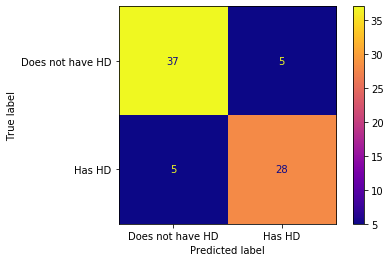

In [29]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      display_labels = ['Does not have HD', 'Has HD'],
                      cmap = 'plasma' #try magma”, “viridis”, "cividis" and “inferno
                     )
#help(plot_confusion_matrix)
#

In the confusion matrix, we can see that of the **37+5 = 42** people that did not have **Heart Disease**, **37 (88%)** were correctly classified. And of the **5 + 28 = 33** people that have **Heart Disease**, **28% (85%)** were correctly classified. So the support vector machine did pretty well without any optimization. That said, it is possible that we can improve predictions using **Cross Validation** to optimize the parameters.

<a id="optimize-svm"> </a>
# Task 9: Optimize Parameters with Cross Validation

Optimizing a **SVM** is all about finding the best value for **gamma**, and, potentially, the regularization paramter, **C**. So let's see if we can find better parameters using cross validation in hopes that we can improve the accuracy with the **Testing Dataset**.

Since we have two parameters to optimize, we will use `GridSearchCV()`. We do this by specifying potential values for **gamma** and **C**, and `GridSearch()` to test all possible combinations of the parameters.

`GridSearchCV()` implements a "fit" and a "score" method.It also implements "predict", "predict_proba", "decision_function", "transform" and "inverse_transform" if they are implemented in the estimator used.

verbose : integer. Controls the verbosity: the higher, the more messages.

In [30]:
param_grid = [{'C':[1, 10, 20, 23, 24, 25, 27, 100],
               'gamma': [0.001, 0.0001],
               'kernel': ['rbf']
              }]
optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv = 5,
                              verbose = 1)
optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished


{'C': 24, 'gamma': 0.0001, 'kernel': 'rbf'}

And we see that the ideal value for **`C`** is **24** and the ideal value for **`gamma`** is **0.0001**.

<a id="draw-svm"></a>
# Task 10: Building, Evaluating, Drawing, and Interpreting the Final Support Vector Machine

Now that we have the ideal values for `gamma` and `C` we can build final **SVM** model:

In [31]:
clf_svm = SVC(random_state=42, C = 24, gamma = 0.0001)
clf_svm.fit(X_train, y_train)

SVC(C=24, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

Now let's draw another confusion matrix to see if the optimized **SVM** does better.

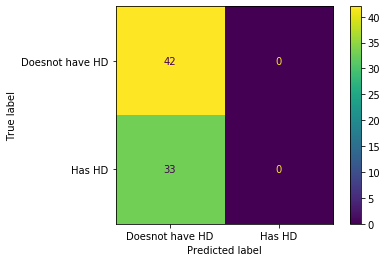

In [32]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      display_labels = ["Doesnot have HD","Has HD"],
                      cmap = 'viridis'
                     )

We see that the optimized **SVM** is better at classifying patients than the preliminary **SVM**.

Out of **38 + 4 = 42** people that did not have heart disease, **38 (90%)** were correctly classified. This is an improvement over the preliminary **SVM**, which only correctly classified **37 (88%)** of the patienst without heart disease. Of the **4 + 29 = 33** people with heart disease, **29 (87%)** were correclty classified. This is also an improvement over the preliminary support vector machine, which only correctly classified **28 (85%)** of the patients with heart disease.

Now, we are going to draw th eoptimized **SVM** dicision boundary and discuss how to interpret it.
The first thing we need to do is count the number of columns in **X**:

In [33]:
len(df.columns)

14

So we see that there are **14** features, or columns, in **X**.
This is a problem because it would require a 14-dimensional graph, one dimension per feature used to make predictions, to plot the data in its raw form. If we wanted to we could just pick two features at random to use as x and y-axis on our graph, but instead, we will use **PCA (Prinicipal Component Anlyisis)** to combine the **14** features into **2** orthogonal meta-features that we can use as axes for a graph.
However, before we shrink the graph, let's first determine how accurate the shruken graph will be. If it's relatively accurate, then it makes sense to draw the 2-Dimensional graph. If not, the shrunken graph will not be very useful. We can determine the accuracy of the graph by drawing something called a **scree plot**.

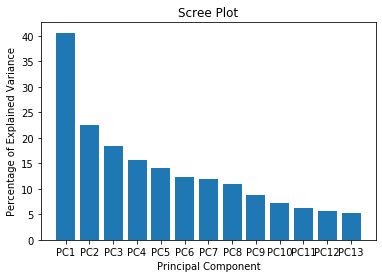

In [34]:
pca = PCA() # By default PCA() centers the data, but doesnot scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*180, decimals = 1)
labels = ['PC'+ str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

The scree plot shows that the first principal component, PC1, account for a relatively large amount of variation in the raw data, and this means that it will be a good candidate for the x-axis in the 2-dimensional graph. Since PC2 account for the next largest amount of variance, we will use that for the y-axis.
Now we will draw the PCA graph.

In [35]:
# help(np.column_stack)

a = np.array((1,2,3))
b = np.array((2,3,4))
np.column_stack((a,b)) #Note double paranthesis

array([[1, 2],
       [2, 3],
       [3, 4]])

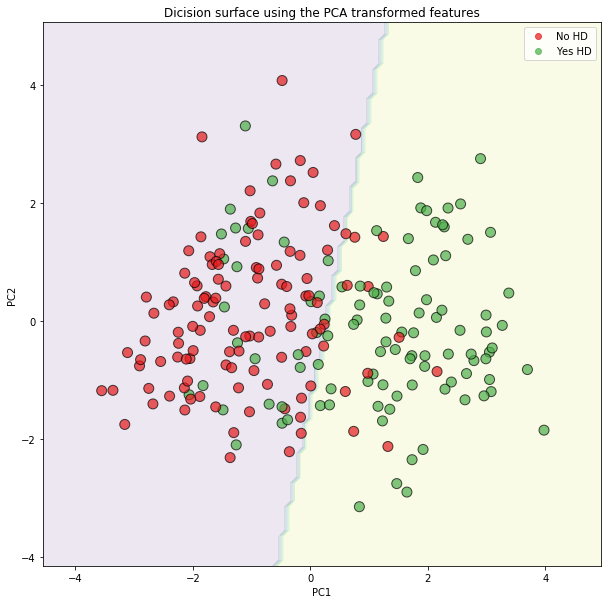

In [36]:
pc1 = X_train_pca[:, 0]
pc2 = X_train_pca[:, 1]

c_stack = np.column_stack((pc1,pc2))
# Now, we fit the SVM to x and y-axis

clf_svm = clf_svm.fit(c_stack, 
                      y_train
                     )

# Now we create a matrix of points that can be used to show the
# decision regions

x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start = x_min, stop = x_max, step = 0.1),
                     np.arange(start = y_min, stop = y_max, step = 0.1))

# Now we will classify every poitn in that matrix with the SVM.
# Point on one side will get 0 and points on the other side will get 1.

Z = clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))

# Right now, Z is just a long array of the lots of 0s and 1s,
# which reflects how each point in the mesh was classified.
# We use reshape() so that each classification (0 or 1) 
# corresponds to a specific point in the matrix.

Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(10,10))

# Now we will use contourf() to draw a filled contour plot
# using matrix values and classifications.
# The contours will be filled according to the 
# predicted classifications (0s and 1s) in Z

ax.contourf(xx, yy, Z, alpha = 0.1)

# Creating custom colors for the actual data points

cmap = colors.ListedColormap(['#e41a1c','#4daf4a'])

# Now we draw the actual data poitns- these will be colored by their
# known classifications 
# Setting alpha = 0.7 lets us see if we are covering up a point 

scatter = ax.scatter(pc1, pc2, c=y_train,
                     cmap = cmap,
                     s = 100,
                     edgecolors = 'k', #'k' = black
                     alpha = 0.7)

# Now create a legend

legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                   loc = 'upper right')
legend.get_texts()[0].set_text('No HD')
legend.get_texts()[1].set_text('Yes HD')
# Axis labels and titles

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Dicision surface using the PCA transformed features')

#plt.savefig('svm.png')
plt.show()

The pink side of the graph on the left is the area were all datapoints will be predicted to *not have* heart disease. The yellow side of the graph on the right is the area where all data points will be predicted to *have* heart disease. The dots are data points in the training dataset and are color coded by there known classifications: red is for those that did *not have* heart disease and green is for those that *did* have heart disease.

### Submitted by Saurabh Gupta